# Regression with Neural Network

Here we use insurance.csv dataset to predict charges using other parameters(age, sex bmi, children, smoker, region)

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

## Collecting Dataset

In [2]:
insurance = pd.read_csv('datasets/insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preprocessing

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [5]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

In [6]:
# Create X & y values
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [7]:
# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Fit the column transformer to our training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [9]:
# Transform training and test data with normalization (MinMaxScaler, OneHotEncoder)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [10]:
X_train[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [12]:
X_train.shape

(1070, 11)

## Training Models

### Model 1

In [13]:
# Build a neural network 

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [14]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3170.0488 - mae: 3170.0488


[3170.048828125, 3170.048828125]

In [15]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Here, the mean absolute error = 3170.

### Model 2
Now, let's try to reduce error by adding more layers and using Adam optimizer

In [16]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [17]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

Here, the error has increased than before

### Model 3
Increase the epochs

In [18]:
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [19]:
# Evaluate model 3
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 934us/step - loss: 3161.9829 - mae: 3161.9829


[3161.98291015625, 3161.98291015625]

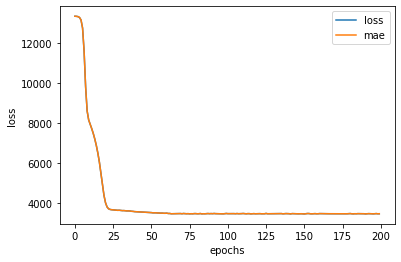

In [20]:
# Plot history 
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs');

Here error is bit lower than model 1

### Model 4

In [21]:
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(learning_rate=0.02),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_4.fit(X_train, y_train, epochs=50, verbose=0)

In [22]:
# Evaluate model 4
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 837us/step - loss: 3163.2454 - mae: 3163.2454


[3163.245361328125, 3163.245361328125]

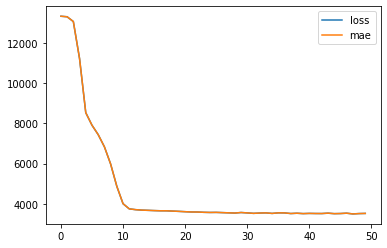

In [23]:
pd.DataFrame(history.history).plot()